# (a) Please briefly describe how to construct your working environments in your report, and write how to execute your code in a ‘README.md’ file.

In [3]:
import sys, os, random, numpy, pandas, matplotlib, tensorflow as tf, textwrap

# Collect versions from the current environment
python_ver = sys.version.split()[0]
tf_ver = tf.__version__
np_ver = numpy.__version__
pd_ver = pandas.__version__
mpl_ver = matplotlib.__version__

lines = [
"# ANN Binary Classification",
"",
"## (a) Environment Setup",
f"- **Language:** Python {python_ver}",
"- **Libraries:**",
f" - TensorFlow {tf_ver}",
f" - NumPy {np_ver}",
f" -Pandas {pd_ver}",
f" - Matplotlib {mpl_ver}",
"- **Backend:** TensorFlow 2.x (CPU or GPU)",
"",
"### Installation Example",
"python -m venv .venv",
"source .venv/bin/activate  # (Windows: .venv\\Scripts\\activate)",
"pip install --upgrade pip",
"pip install tensorflow pandas numpy matplotlib",
"",
"## How to Execute",
"1) Put train.csv, val.csv, test.csv under ./data/",
"2) Run the notebook cells in order.",
"3) Check outputs: training logs, accuracy plot, validation summary, test accuracy.",
"",
"## Deterministic Settings",
"Set the following before training:",
"PYTHONHASHSEED=2025, TF_DETERMINISTIC_OPS=1, and seeds for random/numpy/tensorflow=2025"
]

path = "README_Q4.md"
with open(path, "w", encoding="utf-8") as f:
    f.write("\n".join(lines))

print("CWD:", os.getcwd())
print("Wrote:", os.path.abspath(path))
print("Bytes:", os.path.getsize(path))
print("Preview")
with open (path, "r", encoding="utf-8") as f:
    print("\n".join(f.read().splitlines()[:30]))
print("----------")

CWD: /Users/kim-yujin/Desktop/ncsu-engr-ALDA-Fall2025-H24_HW1/HW4
Wrote: /Users/kim-yujin/Desktop/ncsu-engr-ALDA-Fall2025-H24_HW1/HW4/README_Q4.md
Bytes: 736
Preview
# ANN Binary Classification

## (a) Environment Setup
- **Language:** Python 3.12.7
- **Libraries:**
 - TensorFlow 2.19.0
 - NumPy 2.3.2
 -Pandas 2.3.2
 - Matplotlib 3.10.6
- **Backend:** TensorFlow 2.x (CPU or GPU)

### Installation Example
python -m venv .venv
source .venv/bin/activate  # (Windows: .venv\Scripts\activate)
pip install --upgrade pip
pip install tensorflow pandas numpy matplotlib

## How to Execute
1) Put train.csv, val.csv, test.csv under ./data/
2) Run the notebook cells in order.
3) Check outputs: training logs, accuracy plot, validation summary, test accuracy.

## Deterministic Settings
Set the following before training:
PYTHONHASHSEED=2025, TF_DETERMINISTIC_OPS=1, and seeds for random/numpy/tensorflow=2025
----------


# (b) Please apply a fixed random seed of 2025 in order to generate the same result every time.

In [4]:
import numpy as np

# Python has seed
os.environ['PYTHONHASHSEED'] = '2025'

# TensorFlow deterministic operation
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Define seed value
SEED = 2025

# Fix seed
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Enable determinism in TensorFlow
try:
    tf.config.experimental.enable_op_determinism()
except Exception:
    pass

print("All random seed fixed to", SEED)

All random seed fixed to 2025


# Data Load

In [5]:
import pandas as pd

DATA_DIR = "HW4_data/ann_2025"
print("Using data dir:", DATA_DIR)

LABEL = "Class"

def load_csv_dataset(path_csv, label_col=LABEL):
    df = pd.read_csv(path_csv)
    assert label_col in df.columns, f"'{label_col}' not ound in {path_csv}"
    y = df[label_col].to_numpy().astype('int64')
    X = df.drop(columns=[label_col]).to_numpy().astype('float32')
    return X, y, df

X_train, y_train, df_train = load_csv_dataset(os.path.join(DATA_DIR, "train_data_2025.csv"))
X_val,   y_val,   df_val   = load_csv_dataset(os.path.join(DATA_DIR, "val_data_2025.csv"))
X_test,  y_test,  df_test  = load_csv_dataset(os.path.join(DATA_DIR, "test_data_2025.csv"))

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Using data dir: HW4_data/ann_2025
Train: (1000, 60) Val: (250, 60) Test: (250, 60)


# (c) Create a body of code that iterates over a range of possible numbers of hidden neurons X = (4, 16, 32, 64, 128) that will be used to define a neural network. For each number of hidden neurons, x ∈ X, do the following:

i. Define a neural network with its parameters as follows: activation function for hidden layer = ‘relu’, activation for output layer = ‘softmax’, loss function = ‘sparse categorical crossentropy’, optimizer = ‘adam’, metrics = ‘accuracy’, epochs=5, batch size=10. The model should have a single hidden layer, with the current number of hidden neurons in the loop, x, being assigned to define the size of the single hidden layer.

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

def build_model(n_features, hidden_units):
    """
    Build a single-hidden-layer neural network model.
    
    Parameters:
        n_features (int): Number of input features (columns in X).
        hidden_units (int): Number of neurons in the hidden layer.
        
    Returns:
        model (Sequential): Compiled Keras model ready for training.
    """
    model = Sequential([
        Input(shape=(n_features,)),             # input layer
        Dense(hidden_units, activation='relu'), # hidden layer
        Dense(2, activation='softmax')           # output layer
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

print("build_model() function defined successfully.")

build_model() function defined successfully.


In [7]:
# Run example
n_features = X_train.shape[1]
model = build_model(n_features, hidden_units=16)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010 (3.95 KB)

 Trainable params: 1,010 (3.95 KB)

 Non-trainable params: 0 (0.00 B)

ii. Fit the neural network with the provided training data (this is where you will need the epochs and batch size parameters provided in the previous step). Set shuffle=False in your .fit() call.

iii. Validate the neural network that has a hidden layer of size x using the given validation data. The validation accuracy is used to determine how many numbers of hidden neurons are optimal for this problem. You will want to save this value for later use.

In [8]:
# hyperparameters per the assignment
H_LIST = [4, 16, 32, 64, 128]
EPOCHS = 5
BATCH_SIZE = 10

# Containers for last epoch acc
train_accs = []
val_accs = []

# Keep best by validation acc
best_val = -np.inf
best_h = None
best_model = None

n_features = X_train.shape[1]

for h in H_LIST:
    model = build_model(n_features, hidden_units=h)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        shuffle=False,
        verbose=0
    )

    # (c)-iii Validation step: use last epoch acc
    train_acc = float(history.history['accuracy'][-1])
    val_acc   = float(history.history['val_accuracy'][-1])
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    # Track the best model
    if (val_acc > best_val) or (np.isclose(val_acc, best_val) and (best_h is None or h < best_h)):
        best_val = val_acc
        best_h = h
        best_model = model

    print(f"[Info] Hidden={h:>3} | Train acc={train_acc:.4f} | Val acc={val_acc:.4f}")

print("\nSummary (last epoch acc):")
for h, ta, va in zip(H_LIST, train_accs, val_accs):
    print(f"Hidden={h:>3} | Train={ta:.4f} | Val={va:.4f}")

print(f"\nSelected best hidden size by validation accuracy: {best_h} (val_acc={best_val:.4f})")

[Info] Hidden=  4 | Train acc=0.8470 | Val acc=0.7960
[Info] Hidden= 16 | Train acc=0.8830 | Val acc=0.8440
[Info] Hidden= 32 | Train acc=0.8950 | Val acc=0.8200
[Info] Hidden= 64 | Train acc=0.9070 | Val acc=0.8360
[Info] Hidden=128 | Train acc=0.9170 | Val acc=0.8400

Summary (last epoch acc):
Hidden=  4 | Train=0.8470 | Val=0.7960
Hidden= 16 | Train=0.8830 | Val=0.8440
Hidden= 32 | Train=0.8950 | Val=0.8200
Hidden= 64 | Train=0.9070 | Val=0.8360
Hidden=128 | Train=0.9170 | Val=0.8400

Selected best hidden size by validation accuracy: 16 (val_acc=0.8440)


# (d) Plot a figure, where the horizontal x-axis is the number of hidden neurons, and the vertical y-axis is the accuracy. Please plot both training and validation accuracy in your figure.

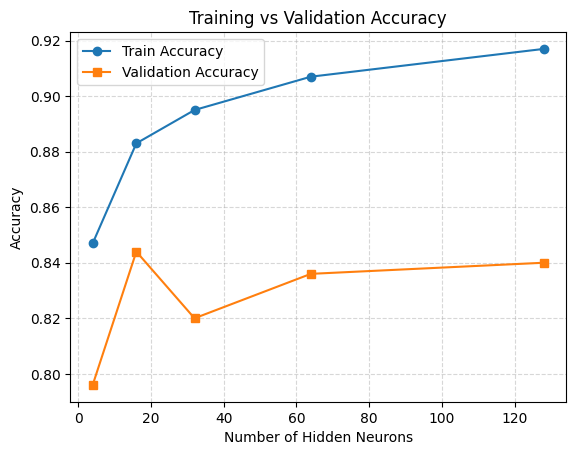

Saved figure to outputs/accuracy_plot.png


In [9]:
import matplotlib.pyplot as plt

os.makedirs("outputs", exist_ok=True)

plt.figure()
plt.plot(H_LIST, train_accs, marker='o', label='Train Accuracy')
plt.plot(H_LIST, val_accs, marker='s', label='Validation Accuracy')
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("outputs/accuracy_plot.png", dpi=150, bbox_inches='tight')
plt.show()

print("Saved figure to outputs/accuracy_plot.png")

# (e) Provide a simple analysis of your results and choose the optimal number of hidden neurons from the analysis.

In [10]:
df_results = pd.DataFrame({
    "hidden": H_LIST,
    "train_acc": [float(x) for x in train_accs],
    "val_acc":   [float(x) for x in val_accs],
})
df_results.to_csv("outputs/results.csv", index=False)
df_results

,hidden,train_acc,val_acc
0,4,0.847,0.796
1,16,0.883,0.844
2,32,0.895,0.820
3,64,0.907,0.836
4,128,0.917,0.840


As shown in the figure and table, increasing the number of hidden neurons form 4 to 16 led to a clear improvement in both training and validation accuracy (Train:0.847 -> 0.883, Val: 0.796 -> 0.844).
However, when the number of hidden neurons exceeded 16, the validation accuracy slightly decreased (e.g., 0.820-0.840) even though the training accuracy continued to incerase.
This trend indicates that the model began to overfit the training data, learning patterns that do not generalize well to unseen data. therefore, the model with 16 hidden neurons provides the best balance between accuracy and generalization, achieving the highest validation accuracy (0.844).

# (f) Report the test accuracy using the given test data on the neural network with the optimal number of hidden neurons.

In [11]:
assert best_model is not None and best_h is not None, "best_model/best_h not set. Re-run the training cell."

test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"[Test] Accuracy (hidden={best_h}): {test_acc:.4f} | loss={test_loss:.4f}")

[Test] Accuracy (hidden=16): 0.8200 | loss=0.3911


2025-10-30 05:34:37.759804: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-10-30 05:34:37.760351: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

I trained a single-hidden-layer ANN with hidden units in {4,16,32,64,128}. Using ReLU in the hidden layer and softmax in the output layer, we optimized with Adam and evaluated accuracy. Validation accuracy peaked at 16 units (0.844), so I selected 16 as the optimal size. The final test accuracy was 0.820 (loss=0.391), indicating good generalization.